In [16]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display
from nptyping import NDArray

sns.set(style='whitegrid')
%config InlineBackend.figure_formats = ['svg']

INPUT_DIR = '../datas'

## 1変量データの扱い

In [8]:
df = pd.read_csv(os.path.join(INPUT_DIR, 'Math&Phys.csv'))
display(df)

,math,phys
0,90,80
1,65,65
2,60,55
3,75,65
4,50,75
...,...,...
141,35,10
142,95,105
143,60,40
144,45,25


ヒストグラムを描写する

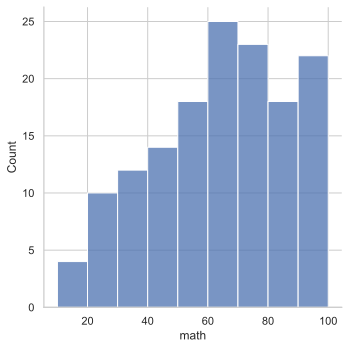

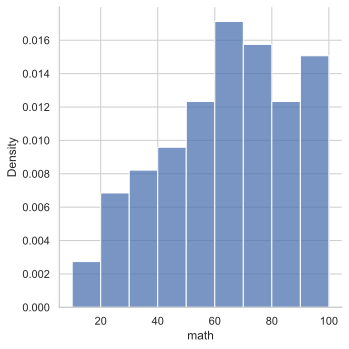

In [13]:
# ヒストグラムを描写
sns.displot(df['math'])
plt.show()

# ヒストグラム（相対頻度）を描写
sns.displot(df['math'], stat='density')
plt.show()

統計量を計算

In [19]:
print(np.mean(df['math']))
print(np.var(df['math']))  # 分散
print(st.tvar(df['math']))  # 不偏分散
print(np.std(df['math']))  # 標準偏差
print(st.tstd(df['math']))  # 不偏分散の平方根

61.60958904109589
503.05990805029086
506.5292867264997
22.428997036209417
22.50620551595714


## 階級数の決め方

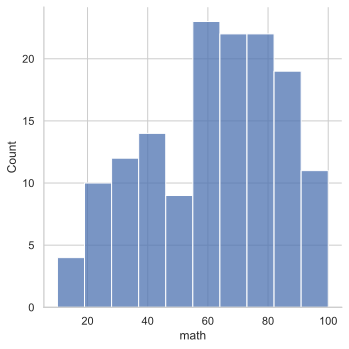

階級幅: 9


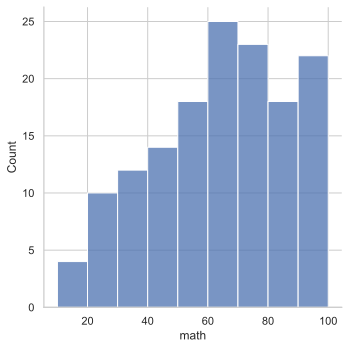

In [24]:
# 10階級に区切る
sns.displot(df['math'], bins=10)
plt.show()


# スタージェスの公式
def sturges(n):
    return int(np.ceil(np.log2(n*2)))

n = sturges(len(df['math']))
print(f'階級幅: {n}')
sns.displot(df['math'], bins=n)
plt.show()

## 分位点と箱ひげ図

In [26]:
# 中央値の計算
print(np.median(df['math']))

# 分位点の計算
print(np.quantile(df['math'], q=[0.25, 0.5, 0.75]))

65.0
[45. 65. 80.]


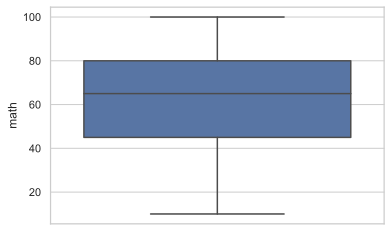

In [31]:
# 箱ひげ図
sns.boxplot(y='math', data=df)
plt.show()

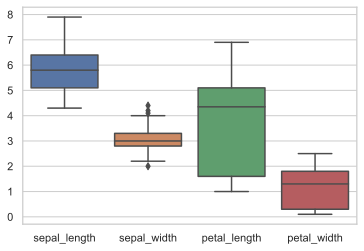

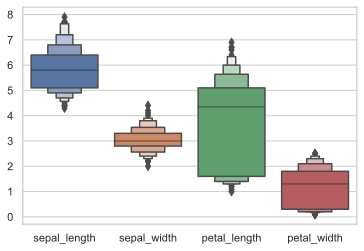

In [33]:
df_iris = sns.load_dataset('iris')
sns.boxplot(data=df_iris.drop('species', axis=1))
plt.show()

sns.boxenplot(data=df_iris.drop('species', axis=1))
plt.show()

## 最頻値（モード）

In [34]:
mode, count = sp.stats.mode(df['math'])
print(mode, count)

[60] [14]


## 章末問題

In [36]:
# 変動係数
man_height_mean = 171.58
man_height_std = 5.63
woman_height_mean = 158.23
woman_height_std = 5.56

print(f'男性身長の変動係数: {man_height_std/man_height_mean:.4f}')
print(f'女性身長の変動係数: {woman_height_std/woman_height_mean:.4f}')

男性身長の変動係数: 0.0328
女性身長の変動係数: 0.0351
